# Word and PDF Documents

## Word documents
- textract
- python-docx
- docx2text

In [1]:
from glob import glob
word_files = glob('data/gfsr_docs/docx/*.docx')
word_files

['data/gfsr_docs/docx\\gfsa1999-2000.docx',
 'data/gfsr_docs/docx\\gfsa2000-2001.docx',
 'data/gfsr_docs/docx\\gfsa2001-2002.docx',
 'data/gfsr_docs/docx\\gfsa2002-2003.docx',
 'data/gfsr_docs/docx\\gfsa2003-2004.docx',
 'data/gfsr_docs/docx\\gfsa2005-2007.docx']

### textract with .docx files

In [2]:
import textract

In [3]:
text = textract.process(word_files[0])
print(type(text))
print(text[:10])
text = text.decode('utf-8')
print(type(text))
text[:200]

<class 'bytes'>
b'Report on '
<class 'str'>


'Report on State/Territory Implementation of the Gun-Free Schools Act\n\n\n\n\n\nSchool Year 1999-2000\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFinal Report\n\nJuly 2002\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPrepared under contract by:\n\n\n\nWestat\n\n\n'

#### Check encodings.

In [4]:
from bs4 import UnicodeDammit

with open(word_files[0], 'rb') as f:
    blob = f.read()
    suggestion = UnicodeDammit(blob)
    print(suggestion.original_encoding)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


utf-8


#### Remove punctuation and numbers.

In [5]:
import string

translator = str.maketrans('', '', string.punctuation + string.digits)
text = text.translate(translator)
text[:100]

'Report on StateTerritory Implementation of the GunFree Schools Act\n\n\n\n\n\nSchool Year \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\words\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

en_stopwords = stopwords.words('english')

print(en_stopwords[:10])

en_stopwords = set(en_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [8]:
words = text.lower().split()

In [9]:
words[:10]

['report',
 'on',
 'stateterritory',
 'implementation',
 'of',
 'the',
 'gunfree',
 'schools',
 'act',
 'school']

In [10]:
words = [w for w in words if w not in en_stopwords and len(w) > 3]

In [11]:
words[:10]

['report',
 'stateterritory',
 'implementation',
 'gunfree',
 'schools',
 'school',
 'year',
 'final',
 'report',
 'july']

In [12]:
bigrams = list([' '.join(bg) for bg in nltk.bigrams(words)])
bigrams[:3]

['report stateterritory',
 'stateterritory implementation',
 'implementation gunfree']

In [13]:
ug_fdist = nltk.FreqDist(words)
bg_fdist = nltk.FreqDist(bigrams)

In [14]:
ug_fdist.most_common(20)

[('state', 472),
 ('number', 437),
 ('question', 356),
 ('data', 343),
 ('students', 334),
 ('gfsa', 280),
 ('alternative', 248),
 ('leas', 244),
 ('expulsions', 214),
 ('school', 208),
 ('percent', 202),
 ('educational', 193),
 ('total', 188),
 ('expelled', 180),
 ('services', 179),
 ('setting', 179),
 ('firearm', 157),
 ('provided', 143),
 ('submitted', 134),
 ('high', 133)]

In [15]:
bg_fdist.most_common(20)

[('educational services', 177),
 ('services alternative', 132),
 ('students expelled', 126),
 ('percentage leas', 122),
 ('number expulsions', 120),
 ('alternative setting', 118),
 ('question state', 117),
 ('state funds', 115),
 ('changed past', 114),
 ('past months', 114),
 ('setting state', 114),
 ('question number', 112),
 ('firearm school', 78),
 ('state address', 74),
 ('address need', 74),
 ('leas provided', 73),
 ('number students', 71),
 ('gunfree schools', 70),
 ('gfsa report', 69),
 ('total number', 67)]

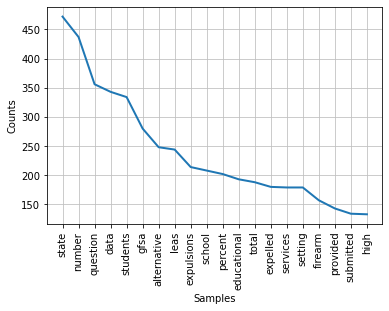

In [16]:
import matplotlib.pyplot as plt

ax = ug_fdist.plot(20)

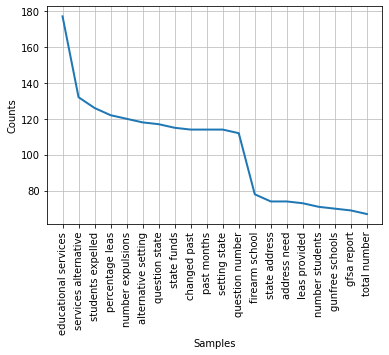

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
bg_fdist.plot(20)

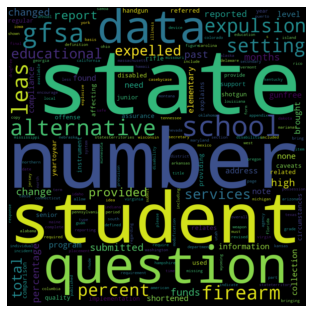

In [18]:
from wordcloud import WordCloud

plt.figure(figsize=(5.5, 5.5))
wordcloud = WordCloud(collocations=False, height=300, width=300, scale=3).generate(' '.join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('B17030_06_02.png', dpi=300)
plt.show()

Let's create a function which will take a path to a folder and generate unigram and bigram frequency plots.

In [19]:
import os
from glob import glob
import textract
import nltk

en_stopwords = set(nltk.corpus.stopwords.words('english'))


def create_fdist_visualizations(path):
    """
    Takes a path to a folder with .docx files, reads and cleans text,
    then plots unigram and bigram frequency distributions.
    """
    word_docs = glob(os.path.join(path, '*.docx'))
    text = ' '.join([textract.process(w).decode('utf-8') for w in word_docs])
    
    # remove punctuation, numbers, stopwords
    translator = str.maketrans('', '', string.punctuation + string.digits)
    text = text.translate(translator)
    words = text.lower().split()
    words = [w for w in words if w not in en_stopwords and len(w) > 3]
    
    unigram_fd = nltk.FreqDist(words)
    bigrams = bigrams = list([' '.join(bg) for bg in nltk.bigrams(words)])
    bigram_fd = nltk.FreqDist(bigrams)
    
    unigram_fd.plot(20)
    bigram_fd.plot(20)

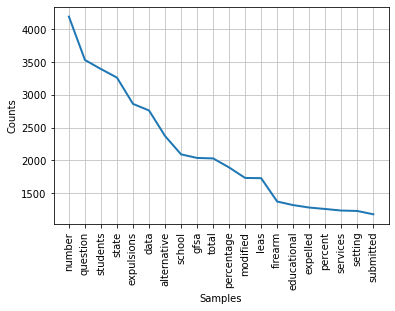

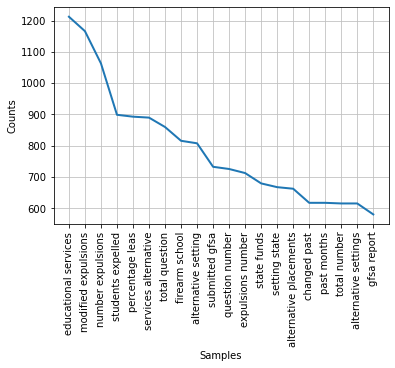

In [20]:
create_fdist_visualizations(r'data/gfsr_docs/docx/')

### .doc files
textract can also parse .doc files (an older Word format), but requires a software called 'antiword'. This is available [here](https://www.softpedia.com/get/Office-tools/Other-Office-Tools/Antiword.shtml) for Windows (instructions [here](https://stackoverflow.com/a/65982286/4549682)), and the [installation instructions](https://textract.readthedocs.io/en/stable/installation.html) for textract show how to install for Mac or Ubuntu/Debian systems.

In [21]:
doc_text = textract.process(r'data/gfsr_docs/gfsa03-04rpt.doc')
doc_text = doc_text.decode('utf-8')
doc_text[:100]

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n                        U.S. DEPARTMENT OF EDUCATION\r\n\r\n\r\n\r\n                  '

We can check the encoding with a few different libraries - in this case, it looks to be windows-1252.

In [22]:
with open(r'data/gfsr_docs/gfsa03-04rpt.doc', 'rb') as f:
    blob = f.read()
    suggestion = UnicodeDammit(blob)

print(suggestion.original_encoding)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


utf-8


### python-docx
We can use python-docx as well, though there is an extra step to get the text:

In [23]:
import docx
doc = docx.Document(word_files[0])

In [24]:
text = ' '.join([p.text for p in doc.paragraphs])

In [25]:
words = text.split()

In [26]:
words[:10]

['Report',
 'on',
 'State/Territory',
 'Implementation',
 'of',
 'the',
 'Gun-Free',
 'Schools',
 'Act',
 'School']

## PDF files

In [27]:
pdf_files = glob('data/ds_pdfs/*.pdf')
pdf_files

['data/ds_pdfs\\2012.07816.pdf',
 'data/ds_pdfs\\2012.08496.pdf',
 'data/ds_pdfs\\2012.12144.pdf',
 'data/ds_pdfs\\2012.15358.pdf',
 'data/ds_pdfs\\2101.02013.pdf',
 'data/ds_pdfs\\2101.05273.pdf',
 'data/ds_pdfs\\2101.05638.pdf',
 'data/ds_pdfs\\2101.06119.pdf',
 'data/ds_pdfs\\2101.09384.pdf',
 'data/ds_pdfs\\2101.12150.pdf']

Again, we can check the encoding of the file if we want.

In [28]:
with open(pdf_files[0], 'rb') as f:
    blob = f.read()
    suggestion = UnicodeDammit(blob)

print(suggestion.original_encoding)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


utf-8


We need to install the pdfminer library for one way to read pdfs: `conda install -c conda-forge pdfminer-six`.

In [29]:
from pdfminer.high_level import extract_text

In [39]:
text = extract_text(pdf_files[0])

In [42]:
print(text[:50])

ENABLING COLLABORATIVE DATA SCIENCE DEVELOPMENT WI


For better preprocessing where we keep all hyphenated words over newlines, we might do something like this: https://stackoverflow.com/a/43667304/4549682

In [32]:
lines = text.split('\n')
cleaned_lines = []
for ln in lines:
    if len(ln) == 0:
        continue
    if ln[-1] == '-':
        cleaned_lines.append(ln[:-1])
    else:
        cleaned_lines.append(ln + ' ')

cleaned = ''.join(cleaned_lines)
cleaned[:200]

'ENABLING COLLABORATIVE DATA SCIENCE DEVELOPMENT WITH THE BALLET FRAMEWORK 0 2 0 2   c e D   4 1     ] G L . s c [     1 v 6 1 8 7 0 . 2 1 0 2 : v i X r a Micah J. Smith 1 J ¨urgen Cito 2 3 Kelvin Lu 1'

In [33]:
def create_fdist_visualizations(path, extension='docx'):
    """
    Takes a path to a folder with .docx files, reads and cleans text,
    then plots unigram and bigram frequency distributions.
    """
    docs = glob(os.path.join(path, f'*.{extension}'))
    if extension in['doc', 'docx']:
        text = ' '.join(textract.process(w).decode('utf-8') for w in docs)
    elif extension == 'pdf':
        text = ' '.join(extract_text(w) for w in docs)
        lines = text.split('\n')
        cleaned_lines = []
        for l in lines:
            if len(l) == 0:
                continue
            if l[-1] == '-':
                cleaned_lines.append(l[:-1])
            else:
                cleaned_lines.append(l + ' ')

        text = ''.join(cleaned_lines)
    
    # remove punctuation, numbers, stopwords
    translator = str.maketrans('', '', string.punctuation + string.digits)
    text = text.translate(translator)
    words = text.lower().split()
    words = [w for w in words if w not in en_stopwords and len(w) > 3]
    
    unigram_fd = nltk.FreqDist(words)
    bigrams = list([' '.join(bg) for bg in nltk.bigrams(words)])
    bigram_fd = nltk.FreqDist(bigrams)
    
    unigram_fd.plot(20)
    bigram_fd.plot(20)

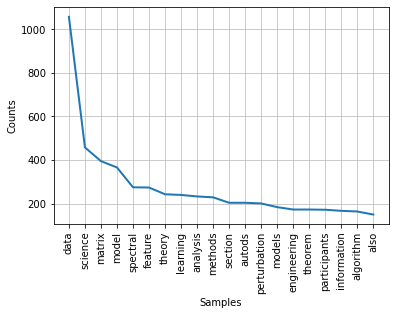

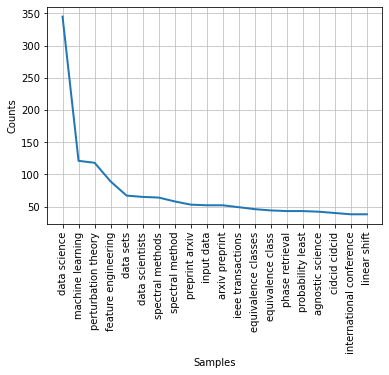

In [34]:
create_fdist_visualizations('data/ds_pdfs/', extension='pdf')

### Other PDF reading libraries

If you don't have JDK installed, you need to install JDK separately or do `conda install -c conda-forge openjdk`.

`conda install -c conda-forge tika -y`

In [35]:
from tika import parser
text = parser.from_file(pdf_files[0])
# returns a dictionary
print(text.keys())
print(text['content'].strip()[:200])

dict_keys(['metadata', 'content', 'status'])
Enabling collaborative data science development with the Ballet framework


ENABLING COLLABORATIVE DATA SCIENCE DEVELOPMENT WITH THE
BALLET FRAMEWORK

Micah J. Smith 1 Jürgen Cito 2 3 Kelvin Lu 1 Kal


`pip install pymupdf`

In [36]:
import fitz  # pymupdf

with fitz.open(pdf_files[0]) as doc:
    text = ""
    for page in doc:
        text += page.getText()

print(text[:200])

ENABLING COLLABORATIVE DATA SCIENCE DEVELOPMENT WITH THE
BALLET FRAMEWORK
Micah J. Smith 1 J¨urgen Cito 2 3 Kelvin Lu 1 Kalyan Veeramachaneni 1
ABSTRACT
While the open-source model for software develo
